## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

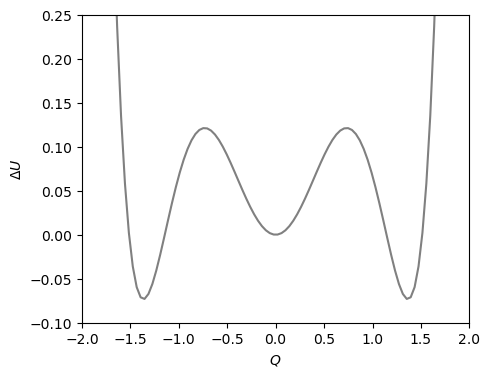

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# define potential function
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# define mesh for plotting
Q_mesh = np.linspace(-2,2,100)
U_mesh = potential_energy(Q_mesh)

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(Q_mesh, U_mesh, color="gray")
plt.xlabel("$Q$")
plt.ylabel("$\Delta U$")
plt.xlim(-2,2)
plt.ylim(-0.1,0.25)
plt.show()

In [177]:
#PSUEDOCODE
#get modules
#define functions and symbols
#solve numerically
#graph motion
#solve for frequency, get data
#Graph frequency

In [178]:
#PSUEDOCODE EXPANDED
#get modules 
#define functions and symbols
    #Define symbols and define Q and V as functions of t
    #Define potential function---- already done above
    #Define differenctial equation
        #INPUT: potential function, time, 
        #OUTPUT: dQdt as V and dVdt as -ddt of potential function
        #TEST: graph dUdt and solve analytically and graph that in desmos, see if the two line up

#solve numerically
    #define initial conditions 
    #define time span
    #call a solve function
        #INPUT: differential equations, initial conditions, time span
        #OUTPUT: numerical answers which can be graphed
        #TEST: graph function with a slider for Q0 and check that the behaviour aligns with what is expected based on U

#graph motion
    #slider for Q0

#solve for frequency
    #solve time for 1 wavelength either using peaks or same method as midterm 2
        #INPUT: motion values, 
        #OUTPUT: frequency data, probably just take this down in excel then format it in notepad++ and put it directly in here
        #TEST: test values where I can predict the behaviour

#Graph frequency


In [179]:
import sympy as sp
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
#from scipy.interpolate import CubicSpline

# Define symbols
m, K, D, Phi, t = sp.symbols('m K D Phi t')
Q = sp.Function("Q")(t)
V = sp.Function("V")(t)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  
"""
    * define_oscillator_equation *
    
    Defines the motion of the oscillator based on the potential energy expression and the given values of the constants

    INPUT: potential energy expression, constants (defined as a list) , allows for mass and 3 other constants, could be modified to include more
    OUTPUT: motion equations dQdt and dVdt
    
""" 

def define_oscillator_equation(potential_energy_expr, constants):

    # Takes defined constants and substitutes them into the expression in place of their symbolic values
    potential_energy_expr = potential_energy_expr.subs(constants)

    # Defines the force function as -dUdQ
    force = -sp.diff(potential_energy_expr, Q)

    # Converts the above force function from a symbolic one into a numerical  function
    force_func = sp.lambdify(Q, force, 'numpy')

    # defines differential equations
    def oscillator(t, y):
        Q, V = y
        dQdt = V
        dVdt = force_func(Q) / constants['m']  # takes mass from constants list
        return [dQdt, dVdt]

    return oscillator
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

"""
    * solve_oscillator *
    
    Numerically solves the motion equations to plot the motion of the oscillator

    INPUT: equations of motion as defined by function above, Q0 as taken from slider value, V0 which will be kept at 0 here
           time span, and number of points to evaluate
    OUTPUT: Numerical solution to the motion of the oscillator, updates depending on Q0 value
    
"""
    
def solve_oscillator(oscillator_func, Q0, V0=0, time_span=(0, 50), num_points=10000):

    y0 = [Q0, V0] #Initial conditions in as a vectpr
    t_eval = np.linspace(time_span[0], time_span[1], num_points) #defines time evaluated based on inputs
    sol = solve_ivp(oscillator_func, time_span, y0, method='RK45', t_eval=t_eval) #numerical solution
    return sol

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

"""
    * find_period_peak_to_peak * 
    
    Finds the period by calculating the time taken from one peak to the next
    
    INPUT: numerical motion solution with Q0
    OUTPUT: period of the solution
    
"""

def find_period_peak_to_peak(sol):
    peaks = []
    for i in range(1, len(sol.t) - 1):
        if sol.y[0][i - 1] < sol.y[0][i] > sol.y[0][i + 1]:
            peaks.append(sol.t[i])  # Record only time of the peaks

    if len(peaks) >= 2:
        period = peaks[1] - peaks[0]  # Time difference between first two peaks
        return period
    return None

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

"""
    * plot_solution *
    
    Plot the solution for motion of the oscillator

    INPUT: motion solution, period
    OUTPUT: Plot, period, and frequency
    
"""

def plot_solution(sol, period=None):

    plt.plot(sol.t, sol.y[0], color='#fc7f1e', label='Displacement (Q)')
    #plt.plot(sol.t, sol.y[1], color='#8c44eb', label='Velocity (V)')  #Remove tag to plot velocity as well
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-4, 4)
    plt.legend()
    plt.grid()

    if period:   #prints the period and frequency values
        frequency = (2 * np.pi) / period
        print(f"Period: {round(period, 3)}")
        print(f"Frequency: {round(frequency, 3)}")

    plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

"""
    * interactive_plot *

    makes the plot interactive, with a slider for Q0,
    this draws upon all previous functions

    INPUT: potential enery expression, constants, above functions
    OUTPUT: interactive plot with Q0 slider

"""
def interactive_plot(potential_energy_expr, constants):

    
    oscillator_func = define_oscillator_equation(potential_energy_expr, constants)
    def update(Q0):
        sol = solve_oscillator(oscillator_func, Q0)
        period = find_period_peak_to_peak(sol)
        plot_solution(sol, period)

    interact(update, Q0=widgets.FloatSlider(value=0.5, min=-1.7, max=1.7, step=0.01, description="Initial Q0")) #Slider for Q0, set at req range
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [180]:
potential_energy = (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6
constants = {'m': 1, 'K': 1, 'D': 2.4, 'Phi': 1 }
interactive_plot(potential_energy, constants)

interactive(children=(FloatSlider(value=0.5, description='Initial Q0', max=1.7, min=-1.7, step=0.01), Output()…

In [181]:
'''
I tried creating functions for this as well, but I couldn't seem to get the function to give me the same values
of frequency as the motion plot, so I opted to collect the data manually instead.
'''




Q0_Values = [-1.7   ,-1.6   ,-1.5   ,-1.4   ,-1.39  ,-1.38  ,-1.37  ,-1.3650,-1.36  ,-1.35  ,
-1.34  ,-1.33  ,-1.32  ,-1.31  ,-1.3   ,-1.2   ,-1.1   ,-1     ,-0.9   ,-0.8   ,
-0.74  ,-0.7325,-0.72  ,-0.71  ,-0.7   ,-0.69  ,-0.68  ,-0.67  ,-0.66  ,-0.65  ,
-0.6   ,-0.5   ,-0.4   ,-0.3   ,-0.2   ,-0.1   ,-0.09  ,-0.08  ,-0.07  ,-0.06  ,
-0.05  ,-0.04  ,-0.03  ,-0.02  ,-0.01  ,0      ,0.01   ,0.02   ,0.03   ,0.04   ,
0.05   ,0.06   ,0.07   ,0.08   ,0.09   ,0.1    ,0.2    ,0.3    ,0.4    ,0.5    ,
0.6    ,0.65   ,0.66   ,0.67   ,0.68   ,0.69   ,0.7    ,0.71   ,0.72   ,
0.73258,0.74   ,0.8    ,0.9    ,1      ,1.1    ,1.2    ,1.3    ,1.31   ,1.32   ,
1.33   ,1.34   ,1.35   ,1.36   ,1.36504,1.37   ,1.38   ,1.39   ,1.4    ,1.5    ,
1.6    ,1.7    ]

f_Values = [0.788  ,0.374  ,2.046  ,2.22   ,2.22   ,2.224  ,2.228  ,0      ,2.24   ,2.22   ,2.22   ,
2.216  ,2.212  ,2.208  ,2.201  ,2.084  ,1.915  ,1.691  ,1.407  ,0.961  ,0.372  ,0      ,
0.215  ,0.42   ,0.392  ,0.457  ,0.482  ,0.514  ,0.54   ,0.556  ,0.639  ,0.762  ,0.852  ,
0.919  ,0.964  ,0.992  ,0.993  ,0.995  ,0.996  ,0.997  ,0.999  ,0.999  ,1      ,1      ,
1      ,0      ,1      ,1      ,1      ,0.999  ,0.998  ,0.997  ,0.996  ,0.994  ,0.993  ,
0.991  ,0.965  ,0.919  ,0.852  ,0.762  ,0.637  ,0.554  ,0.548  ,0.519  ,0.485  ,0.454  ,
0.353  ,0.429  ,0.303  ,0      ,0.769  ,0.961  ,1.42   ,1.693  ,1.915  ,2.091  ,
2.201  ,2.204  ,2.212  ,2.22   ,2.22   ,2.24   ,2.24   ,0      ,2.24   ,2.22   ,2.22   ,
2.216  ,2.205  ,0.375  ,0.787  ]


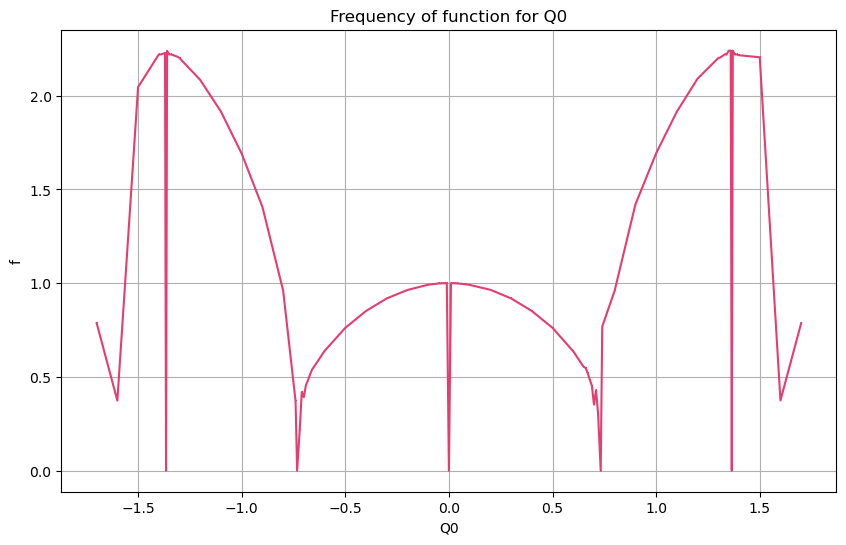

In [182]:
#Plot of the frequency, I tried interpolation but none of the methods worked like i would have wanted.
plt.figure(figsize=(10, 6)) 

plt.plot(Q0_Values, f_Values, marker=',', color='#e63c6f', linestyle='-')

plt.xlabel('Q0')
plt.ylabel('f')
plt.title('Frequency of function for Q0')
plt.grid(True)
plt.show()

The plot is symettrical across the y axis, there are 5 points at which the frequency is 0. Corresponding to the 3 stable and 2 unstable equilibrium points of the potential energy graph. There is a smooth upwards curve about 0. At the unstable equilibrium points the frequency falls and then rises sharply. The frequency rises until the outer stable equilibrium points are reached, here the frequency is 0. After these points, the oscillator would be able to move through the full potential energy range, because of this the frequency dips sharply.